In [2]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import soundfile as sf
import numpy as np

In [22]:
audio_path1 = 'data/Segmented_Laugh/220.wav'
x1 , sr1 = librosa.load(audio_path1, sr=None)#sr=None means the signal is sampled at original sample rate
#librosa.load(audio_path, sr=44100)#The sampling rate can also be specified
#librosa.load(audio_path)#The defaults sampling rate is 22KHz

#non-laugh
audio_path2 = 'data/Segmented_NonLaugh4/220.wav'
x2 , sr2 = librosa.load(audio_path2, sr=None)
print("One",type(x1), type(sr1))
print(x1.shape,sr1)
print("Two",type(x2), type(sr2))
print(x2.shape,sr2)

One <class 'numpy.ndarray'> <class 'int'>
(8000,) 16000
Two <class 'numpy.ndarray'> <class 'int'>
(8000,) 16000


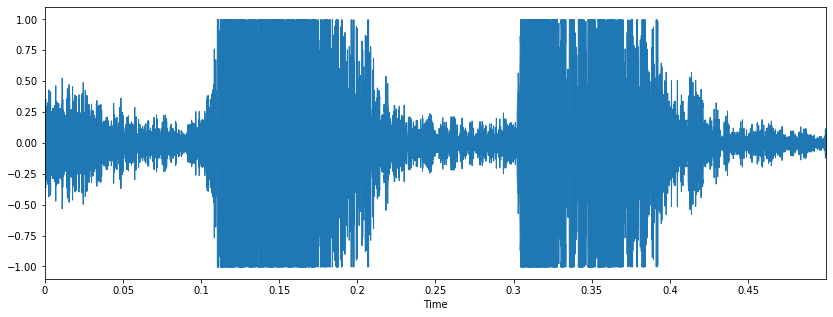

In [4]:
#display waveform
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
ipd.Audio(audio_path)


(20, 1)
Rate : 16000


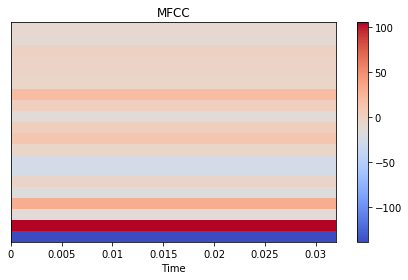

In [19]:
mfccs = librosa.feature.mfcc(x[-511:-1], sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
print("Rate : "+str(sr))

In [26]:
#mfccs
np.set_printoptions(suppress=True)
print(mfccs[0,:])

[  12.643299    -1.6118838  -28.365864    93.20416    151.4845
  159.03795    130.06956     38.462097   -50.86887     78.09343
  143.63586    152.13988    120.637924    27.378107   -84.24048
 -128.28912  ]


# CALCULATING ZERO CROSSINGS

(8000,)
0 2000
(1025, 4)


/home/sjsingh/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


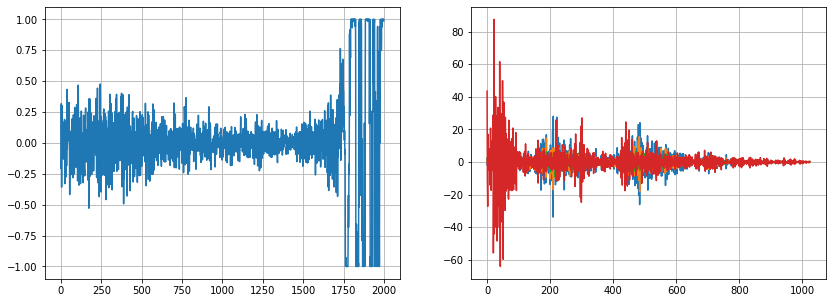

In [27]:
# Zooming in
print(x.shape)
n0 = 0
n1 = 2000
print(str(n0)+" "+str(n1))
plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)
plt.plot(x[n0:n1])
plt.grid()

plt.subplot(1,2,2)
ft=librosa.stft(x[n0:n1])
plt.plot(ft)
print(ft.shape)
plt.grid()

plt.show()

# FINDING NUMBER OF ZERO CROSSING

In [231]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

6


# LOUDNESS (db)

(1025, 4)


/home/sjsingh/.local/lib/python3.6/site-packages/librosa/core/spectrum.py:1700: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


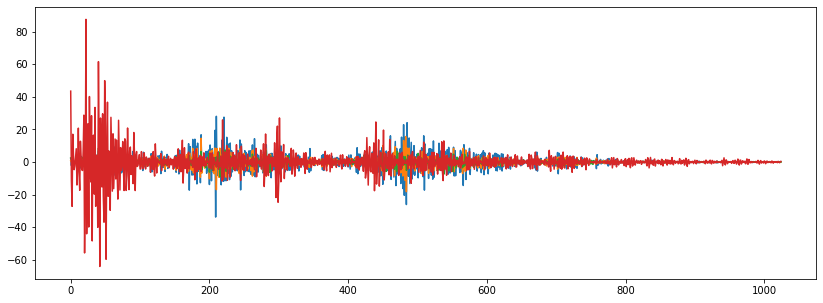

In [17]:
aft =(librosa.stft(x[n0:n1]))
Xdb = librosa.amplitude_to_db(aft)
print(Xdb.shape)
plt.figure(figsize=(14, 5))
plt.plot(aft)


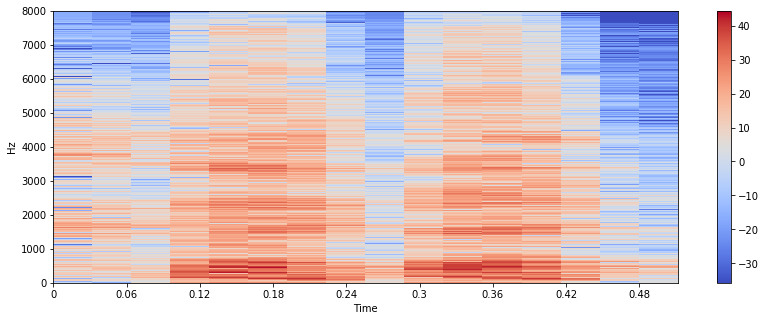

In [233]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# CALCULATING MFCC'S

(20, 16)


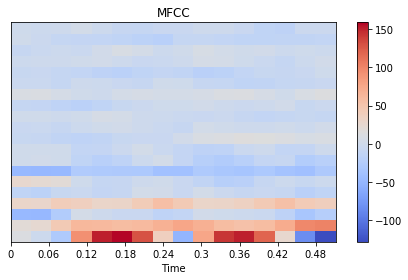

In [212]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [88]:
0.5/16

0.03125

In [86]:
sr

16000

In [36]:
librosa.effects.split(x, top_db=0.0001, frame_length=2048, hop_length=512)

array([[230400, 230912]])

In [63]:
from pydub import AudioSegment
t1 = 5 * 1000 #Works in milliseconds
t2 = 6 * 1000
newAudio = AudioSegment.from_wav("data/vocalizationcorpus/data/S0006.wav")
newAudio = newAudio[t1:t2]
newAudio.export('newSong.wav', format="wav")

<_io.BufferedRandom name='newSong.wav'>

In [69]:
audio_path = 'data/vocalizationcorpus/data/S0006.wav'
x , sr = librosa.load(audio_path, sr=None)#sr=None means the signal is sampled at original sample rate
#librosa.load(audio_path, sr=44100)#The sampling rate can also be specified
#librosa.load(audio_path)#The defaults sampling rate is 22KHz
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [70]:
x.shape[0]

176000

In [71]:
sr

16000

In [75]:
sf.write('new.wav', x[16000:16000*3], sr)

In [76]:
audio_path = 'new.wav'
y , sr2 = librosa.load(audio_path, sr=None)#sr=None means the signal is sampled at original sample rate
#librosa.load(audio_path, sr=44100)#The sampling rate can also be specified
#librosa.load(audio_path)#The defaults sampling rate is 22KHz
print(type(y), type(sr2))

<class 'numpy.ndarray'> <class 'int'>


In [77]:
ipd.Audio(audio_path)

In [78]:
y.shape

(32000,)